In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [2]:
df = pd.read_csv('/Users/taddbackus/School/fall23/qtw/cs2/dataset_diabetes/diabetic_data.csv')
mappings = pd.read_csv('/Users/taddbackus/School/fall23/qtw/cs2/dataset_diabetes/IDs_mapping.csv')

In [3]:
df.replace('?',np.nan,inplace=True)

In [5]:
print('All data =', len(df))
print('----------')
for i in df:
    if df[i].isnull().sum() > 0:
        print(i,':',df[i].isnull().sum(),'missing')
        print(i,':',df[i].isnull().sum() / len(df),'%')

All data = 101766
----------
race : 2273 missing
race : 0.022335554114340742 %
weight : 98569 missing
weight : 0.9685847925633315 %
payer_code : 40256 missing
payer_code : 0.395574160328597 %
medical_specialty : 49949 missing
medical_specialty : 0.49082208203132677 %
diag_1 : 21 missing
diag_1 : 0.0002063557573256294 %
diag_2 : 358 missing
diag_2 : 0.0035178743391702533 %
diag_3 : 1423 missing
diag_3 : 0.013983059174970029 %


In [6]:
df.drop(['weight','payer_code','medical_specialty'],
        axis=1,
        inplace=True)

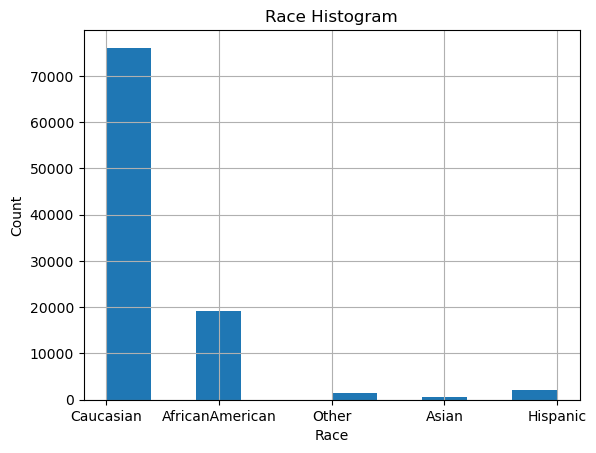

In [8]:
df['race'].hist()
plt.title('Race Histogram')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()
df['race'] = df['race'].fillna('Caucasian')

<Axes: >

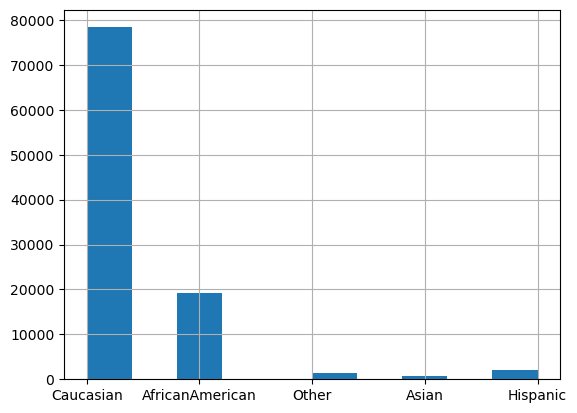

In [9]:
df['race'].hist()

In [10]:
dfEncoded= df.copy()

In [11]:
dfEncoded.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [12]:
columns_to_encode = [
    'race', 'gender', 'max_glu_serum',
    'metformin', 'repaglinide', 'nateglinide', 
    'chlorpropamide', 'glimepiride', 'acetohexamide', 
    'glipizide', 'glyburide', 'tolbutamide',
    'pioglitazone', 'rosiglitazone', 'acarbose', 
    'miglitol', 'troglitazone', 'tolazamide', 
    'examide', 'citoglipton', 'insulin', 
    'glyburide-metformin', 'glipizide-metformin', 
    'glimepiride-pioglitazone', 'metformin-rosiglitazone',
    'metformin-pioglitazone'
]

In [13]:
print(dfEncoded.shape)
for columnName in columns_to_encode:
    columnEncoded = pd.get_dummies(dfEncoded[columnName],
                                   prefix=columnName,
                                   prefix_sep='_')
    dfEncoded.drop(columnName,
                   axis=1,
                   inplace=True)
    dfEncoded = dfEncoded.join(columnEncoded)
print(dfEncoded.shape)

(101766, 47)
(101766, 104)


In [14]:
dfEncoded.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_No,glipizide-metformin_Steady,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-rosiglitazone_Steady,metformin-pioglitazone_No,metformin-pioglitazone_Steady
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,...,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,...,0.006800,0.000079,0.999872,0.000128,0.999990,0.000010,0.999980,0.000020,0.999990,0.000010
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,...,0.082181,0.008866,0.011302,0.011302,0.003135,0.003135,0.004433,0.004433,0.003135,0.003135
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
for i in dfEncoded['A1Cresult'].unique():
    print(i)
dfEncoded['A1Cresult'].replace(['None','Norm','>7','>8'],
                               [0,1,2,3],
                               inplace=True)

None
>7
>8
Norm


In [16]:
for i in dfEncoded['change'].unique():
    print(i)
dfEncoded['change'].replace(['No','Ch'],
                            [0,1],
                            inplace=True)


No
Ch


In [17]:
for i in dfEncoded['diabetesMed'].unique():
    print(i)
dfEncoded['diabetesMed'].replace(['No','Yes'],
                                 [0,1],
                                 inplace=True)


No
Yes


In [18]:
for i in dfEncoded['age'].unique():
    print(i)
dfEncoded['age'].replace(['[0-10)','[10-20)','[20-30)',
                        '[30-40)','[40-50)','[50-60)',
                        '[60-70)','[70-80)','[80-90)',
                        '[90-100)'],
                        [0,1,2,
                        3,4,5,
                        6,7,8,
                        9],
                        inplace=True)

[0-10)
[10-20)
[20-30)
[30-40)
[40-50)
[50-60)
[60-70)
[70-80)
[80-90)
[90-100)


In [19]:
diag1 = pd.get_dummies(dfEncoded['diag_1'])
diag1.replace(0, np.nan, inplace=True)
diag2 = pd.get_dummies(dfEncoded['diag_2'])
diag2.replace(0, np.nan, inplace=True)
diag3 = pd.get_dummies(dfEncoded['diag_3'])
diag3.replace(0, np.nan, inplace=True)

In [20]:
diag = diag1.combine_first(diag2)
diag = diag.combine_first(diag3)

In [21]:
diag.replace(np.nan, 0, inplace=True)
diag.describe()

,10,11,110,111,112,114,115,117,122,123,...,V64,V65,V66,V67,V69,V70,V71,V72,V85,V86
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,...,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,0.000010,0.000147,0.000295,0.000020,0.004668,0.000020,0.000039,0.000255,0.000010,0.000020,...,0.000708,0.000462,0.000246,0.000010,0.000010,0.000098,0.000088,0.000206,0.002604,0.000049
std,0.003135,0.012140,0.017167,0.004433,0.068160,0.004433,0.006269,0.015982,0.003135,0.004433,...,0.026590,0.021486,0.015672,0.003135,0.003135,0.009912,0.009404,0.014364,0.050963,0.007009
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
dfEncoded.drop(['diag_1','diag_2','diag_3'],
                           axis=1,
                           inplace=True)
dfEncoded = dfEncoded.join(diag)

In [23]:
print(dfEncoded.shape)
print('===========')
print('data =', len(dfEncoded))
print('-----------')
for i in dfEncoded:
    if dfEncoded[i].isnull().sum() > 0:
        print(i,'=',dfEncoded[i].isnull().sum())

(101766, 1016)
data = 101766
-----------


(101766, 1015)
(101766,)


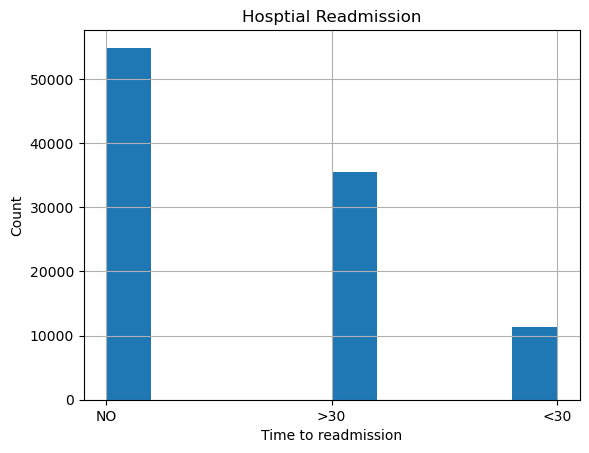

In [72]:
X = dfEncoded.drop(['readmitted'],axis=1)
y = dfEncoded['readmitted']
yReadmitted = dfEncoded['readmitted'].replace(['NO','>30','<30'],
                                              [0,1,1])
yLessThan30 = dfEncoded['readmitted'].replace(['NO','>30','<30'],
                                              [0,0,1])
featureNames = X.columns.tolist()
print(X.shape)
print(y.shape)
dfEncoded['readmitted'].hist()
plt.title('Hosptial Readmission')
plt.xlabel('Time to readmission')
plt.ylabel('Count')
plt.show()

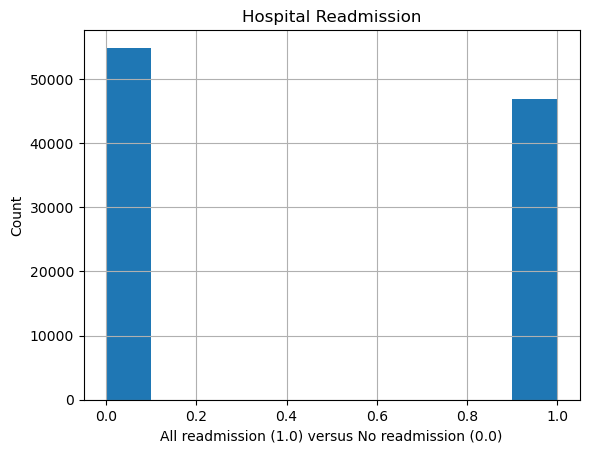

In [44]:
yReadmitted.hist()
plt.title('Hospital Readmission')
plt.xlabel('All readmission (1.0) versus No readmission (0.0)')
plt.ylabel('Count')
plt.show()

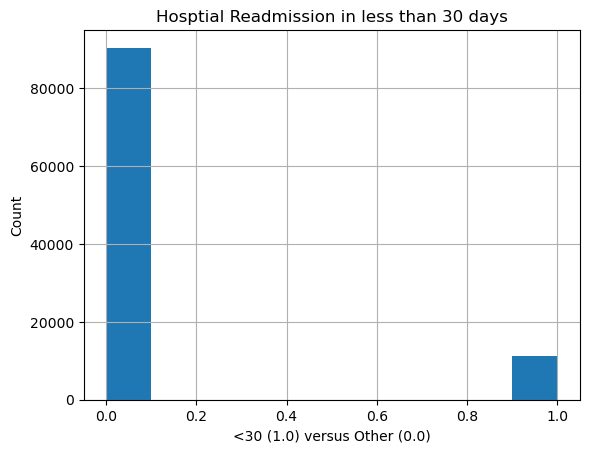

In [43]:
yLessThan30.hist()
plt.title('Hosptial Readmission in less than 30 days')
plt.xlabel('<30 (1.0) versus Other (0.0)')
plt.ylabel('Count')
plt.show()

In [73]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(data=X_scaled,columns=X.columns)

In [74]:
model = LogisticRegression(class_weight='balanced')

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    yReadmitted,
                                                    test_size=0.2,
                                                    random_state=42)


In [76]:
readmitModel = model.fit(X_train,y_train)
readmitPred = readmitModel.predict_proba(X_test)

In [80]:
accReadmit = []
recallReadmit = []
precReadmit = []
threshold = np.arange(0,1.1,0.1)
for i in threshold:
    results = (readmitPred[:,1] >= i).astype(int)
    accReadmit.append(accuracy_score(y_test,results))
    recallReadmit.append(recall_score(y_test,results))
    precReadmit.append(precision_score(y_test,results))

/Users/taddbackus/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


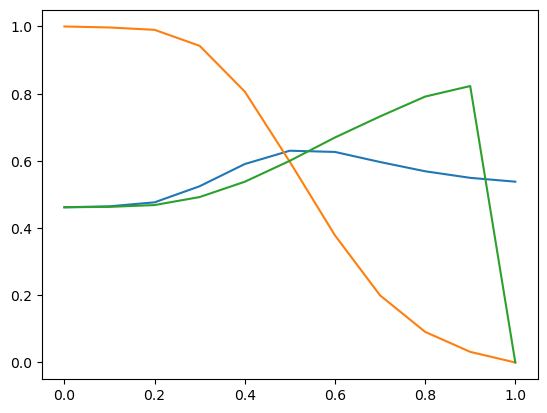

In [81]:
plt.plot(threshold,accReadmit)
plt.plot(threshold,recallReadmit)
plt.plot(threshold,precReadmit)
plt.show()

In [62]:
cvReadmit = cross_val_score(model,
                            X_scaled,
                            yReadmitted,
                            scoring='recall',
                            cv=5)


In [63]:
print(cvReadmit)

[0.5889564  0.63379531 0.66247335 0.6673774  0.31244004]


In [65]:
readmitCoefs = readmitModel.coef_
readmitCoefsDF = pd.DataFrame({'Feature':featureNames,
                               'Coefficient':readmitCoefs[0]})
readmitCoefsDF = readmitCoefsDF.reindex(readmitCoefsDF['Coefficient'].abs().sort_values(ascending=False).index)
print(readmitCoefsDF)

                Feature  Coefficient
12     number_inpatient     0.438751
0          encounter_id    -0.310179
1           patient_nbr     0.245806
11     number_emergency     0.202454
13     number_diagnoses     0.160118
..                  ...          ...
842                 957     0.000024
463                 487     0.000022
39   nateglinide_Steady    -0.000012
82           examide_No     0.000000
83       citoglipton_No     0.000000

[1015 rows x 2 columns]


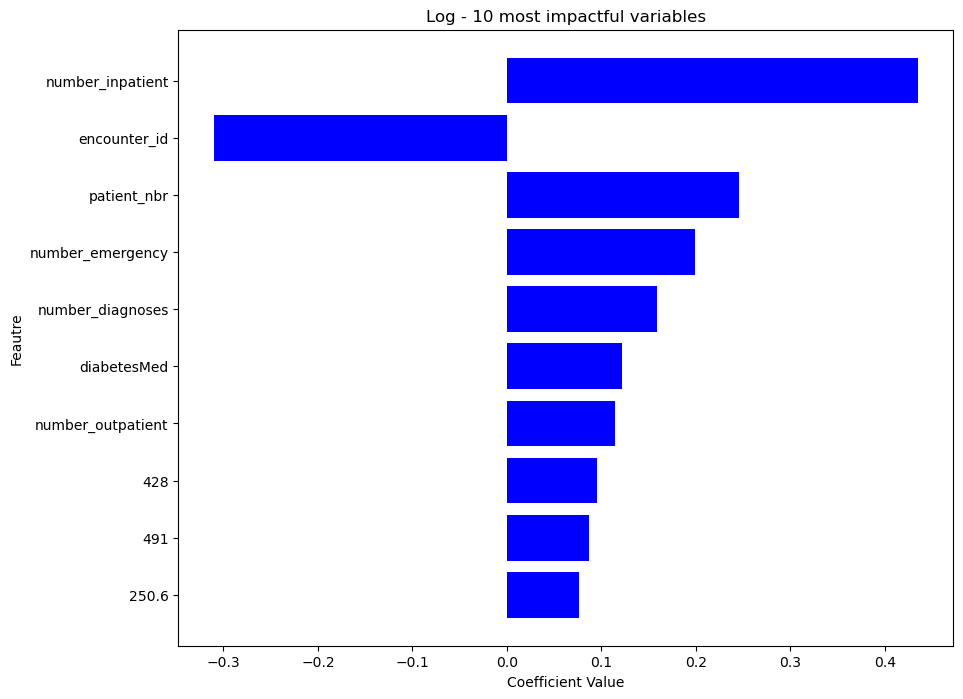

In [171]:
plt.figure(figsize=(10,8))
plt.barh(readmitCoefsDF['Feature'][:10],
         readmitCoefsDF['Coefficient'][:10],
         color='blue')
plt.title('Log - 10 most impactful variables')
plt.xlabel('Coefficient Value')
plt.ylabel('Feautre')
plt.gca().invert_yaxis()
plt.show()

In [66]:
X_scaled.drop(['encounter_id','patient_nbr'],
              axis=1,
              inplace=True)

In [69]:
cvReadmit = cross_val_score(model,
                            X_scaled,
                            yReadmitted,
                            scoring='accuracy',
                            cv=5)

In [70]:
print(cvReadmit)

[0.61467034 0.61700978 0.60757628 0.61995775 0.62128433]


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    yLessThan30,
                                                    test_size=0.2,
                                                    random_state=42)


In [83]:
under30Model = model.fit(X_train,y_train)
under30Pred = under30Model.predict_proba(X_test)

In [84]:
accUnder30 = []
recallUnder30 = []
precUnder30 = []
for i in threshold:
    results = (under30Pred[:,1] >= i).astype(int)
    accUnder30.append(accuracy_score(y_test,results))
    recallUnder30.append(recall_score(y_test,results))
    precUnder30.append(precision_score(y_test,results))

/Users/taddbackus/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


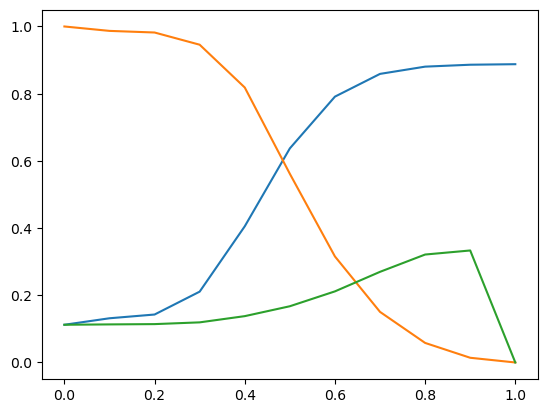

In [85]:
plt.plot(threshold, accUnder30)
plt.plot(threshold, recallUnder30)
plt.plot(threshold, precUnder30)
plt.show()

In [154]:
cvUnder30 = cross_val_score(model,
                            X_train,
                            y_train,
                            scoring='accuracy',
                            cv=5)

In [155]:
print(cvUnder30)

[0.63907142 0.64564269 0.6370839  0.63683823 0.63591696]


In [173]:
under30Coefs = under30Model.coef_
under30CoefsDF = pd.DataFrame({'Feature':featureNames,
                               'Coefficient':under30Coefs[0]})
under30CoefsDF = under30CoefsDF.reindex(under30CoefsDF['Coefficient'].abs().sort_values(ascending=False).index)
print(under30CoefsDF)

              Feature   Coefficient
12   number_inpatient  3.329016e-01
374               386 -1.370645e-01
441               462 -1.218566e-01
496               527 -1.137203e-01
819               923 -1.102642e-01
..                ...           ...
138               160 -1.169844e-17
489               520 -2.704254e-18
589               640  2.047919e-20
83     citoglipton_No  0.000000e+00
82         examide_No  0.000000e+00

[1015 rows x 2 columns]


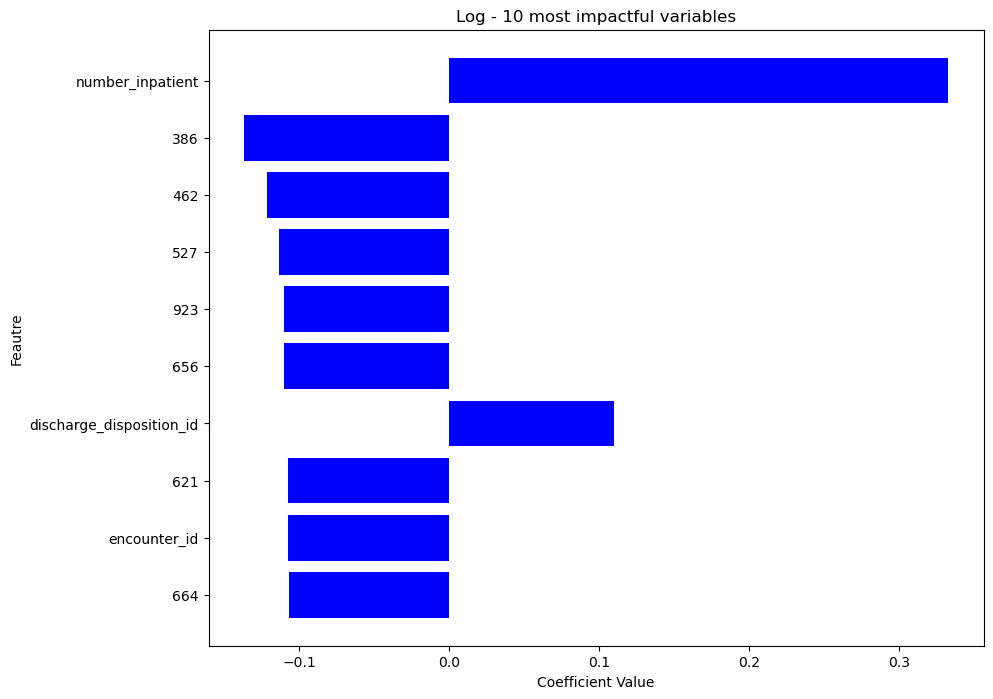

In [174]:
plt.figure(figsize=(10,8))
plt.barh(under30CoefsDF['Feature'][:10],
         under30CoefsDF['Coefficient'][:10],
         color='blue')
plt.title('Log - 10 most impactful variables')
plt.xlabel('Coefficient Value')
plt.ylabel('Feautre')
plt.gca().invert_yaxis()
plt.show()